<a href="https://colab.research.google.com/github/Migrice/Master2-Projects/blob/main/TP_info_5119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

#load librairies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
import os



In [7]:
#extract file from Zipe file

from zipfile import ZipFile 
  
# spécifiant le nom du fichier zip
file = "play_store_reviews.zip"
  
# ouvrir le fichier zip en mode lecture
with ZipFile(file, 'r') as zip: 
    # afficher tout le contenu du fichier zip
    zip.printdir() 
  
    # extraire tous les fichiers
    print('extraction...') 
    zip.extractall() 
    print('Terminé!')

File Name                                             Modified             Size
reviews.csv                                    2020-12-24 08:17:04      6451055
extraction...
Terminé!


In [8]:
#load dataset

df = pd.read_csv("reviews.csv")
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaN,newest,com.anydo
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,2020-10-27 14:03:28,"Please note that from checking our records, yo...",2020-10-27 15:05:52,newest,com.anydo
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,2020-10-27 08:18:40,NaN,NaN,newest,com.anydo
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,NaN,2020-10-26 13:28:07,What do you find troublesome about the update?...,2020-10-26 14:58:29,newest,com.anydo
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,2020-10-26 06:10:50,NaN,NaN,newest,com.anydo


In [9]:
#dimensions of dataset

df.shape

(12495, 12)

In [10]:
#get informations about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12495 entries, 0 to 12494
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              12495 non-null  object
 1   userName              12495 non-null  object
 2   userImage             12495 non-null  object
 3   content               12495 non-null  object
 4   score                 12495 non-null  int64 
 5   thumbsUpCount         12495 non-null  int64 
 6   reviewCreatedVersion  10333 non-null  object
 7   at                    12495 non-null  object
 8   replyContent          5818 non-null   object
 9   repliedAt             5818 non-null   object
 10  sortOrder             12495 non-null  object
 11  appId                 12495 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.1+ MB


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'review score')

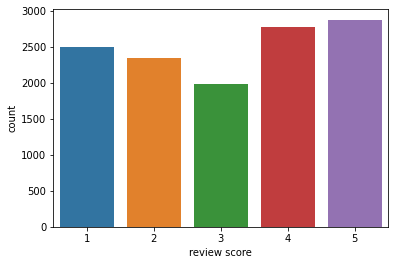

In [11]:
#view distribution of scores

sns.countplot(df.score)
plt.xlabel("review score")

In [12]:
#separate scores into 3 classes
def to_sentiment(score):
  score = int(score)
  if score <=2 :
    return 0
  elif score ==3:
    return 1
  else :
    return 2

df["sentiment"] = df.score.apply(to_sentiment)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'negative'), Text(0, 0, 'neutral'), Text(0, 0, 'positive')]

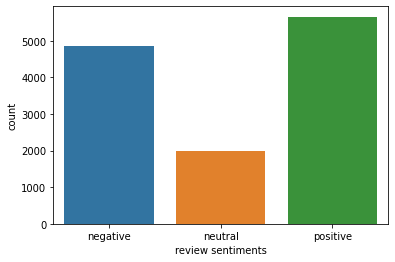

In [13]:
classnames = ["negative","neutral", "positive"]
ax = sns.countplot(df["sentiment"])
plt.xlabel("review sentiments")

ax.set_xticklabels(classnames)

In [14]:
#Data preprocessing

from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

In [17]:
#test on an example
sample_txt = 'When was I last outside? I am stuck at home for 2 weeks.'
encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=32,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
)

encoding.keys()

dict_keys(['input_ids', 'attention_mask'])

In [19]:
print(len(encoding["input_ids"][0]))
print(encoding["input_ids"]) #tokens
print(encoding["attention_mask"]) #1 represent real words and 0 represent paddings
print(tokenizer.convert_ids_to_tokens(encoding["input_ids"][0]))
print("Results")

32
tensor([[ 101, 1332, 1108,  146, 1314, 1796,  136,  146, 1821, 5342, 1120, 1313,
         1111,  123, 2277,  119,  102,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])
['[CLS]', 'When', 'was', 'I', 'last', 'outside', '?', 'I', 'am', 'stuck', 'at', 'home', 'for', '2', 'weeks', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
Results


In [21]:
#check the maximum sequence length

token_lens = []
for txt in df.content:
  token = tokenizer.encode(txt, max_length=512)
  token_lens.append(len(token))


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Token count')

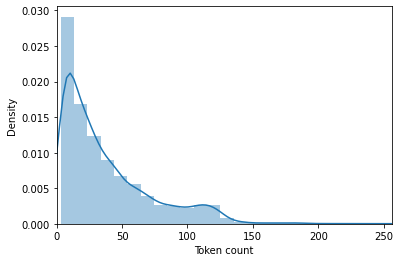

In [22]:
#plot to see the distribution

sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count')

In [23]:
max_length = 160
class GPReviewDataset(torch.utils.data.Dataset):

  def __init__(self, reviews, targets, tokenizer, max_len):
    self.reviews = reviews
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
  
  def __len__(self):
    return len(self.reviews)
  
  def __getitem__(self, item):
    review = str(self.reviews[item])
    target = self.targets[item]

    encoding = self.tokenizer.encode_plus(
      review,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      truncation=True,
      return_tensors='pt',
    )

    return {
      'review_text': review,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [24]:
#separate dataset into train, test, val

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=42)

df_train.shape, df_val.shape, df_test.shape

((9996, 13), (1249, 13), (1250, 13))

In [25]:
#create data loader

def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = GPReviewDataset(
    reviews=df.content.to_numpy(),
    targets=df.sentiment.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )

  return torch.utils.data.DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4
  )

In [26]:
BATCH_SIZE = 16

train_data_loader = create_data_loader(df_train, tokenizer, max_length, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, max_length, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, max_length, BATCH_SIZE)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:563: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [27]:
#look of datas
data = next(iter(train_data_loader))
data.keys()

dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])

In [28]:
print(data['input_ids'].shape)
print(tokenizer.convert_ids_to_tokens(data["input_ids"][0]))
print(data['attention_mask'].shape)
print(data['targets'].shape)

torch.Size([16, 160])
['[CLS]', 'I', 'kinda', 'love', 'this', 'app', 'but', 'the', 'only', 'problem', 'that', 'I', "'", 've', 'face', 'now', 'is', 'that', 'i', 'want', 'to', 'have', 'my', 'task', 'on', 'my', 'p', '##c', 'and', 'i', 'think', 'it', 'would', 'be', 'great', 'if', 'you', 'could', 'put', 'some', 'accounts', 'so', 'that', 'we', 'can', 'easily', 'sort', 'our', 'task', 'in', 'any', 'devices', 'that', 'we', 'are', 'into', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', 

In [29]:
#load bert model

bert_model = BertModel.from_pretrained("bert-base-cased")

Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [30]:

#use the bert model to encode the text

last_hidden_state, pooled_output = bert_model(
  input_ids=encoding['input_ids'], 
  attention_mask=encoding['attention_mask'],
)

In [32]:
from torch import nn
class SentimentClassifier(nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.bert = BertModel.from_pretrained("bert-base-cased")
    self.dropout = nn.Dropout(p=0.3)
    self.linear = nn.Linear(self.bert.config.hidden_size, n_classes)
  
  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
    output = self.dropout(pooled_output)
    return self.linear(output)

In [33]:
#create an instance of a model and move it to the GPU

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = SentimentClassifier(len(classnames))
model = model.to(device)

In [34]:
#put the input ids and attention_mask to the GPU

input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)

print(input_ids.shape) # batch size x seq length
print(attention_mask.shape) # batch size x seq length

torch.Size([16, 160])
torch.Size([16, 160])


In [35]:
#to get the predicted probabilities, we will apply the softmax function to the output

from torch.nn import functional as F
F.softmax(model(input_ids, attention_mask), dim=1)

tensor([[0.3654, 0.3679, 0.2667],
        [0.3580, 0.4586, 0.1833],
        [0.4508, 0.4079, 0.1414],
        [0.2620, 0.5182, 0.2198],
        [0.3412, 0.4571, 0.2017],
        [0.5001, 0.2381, 0.2617],
        [0.2668, 0.5802, 0.1530],
        [0.4845, 0.3505, 0.1650],
        [0.3408, 0.3843, 0.2749],
        [0.5209, 0.3150, 0.1641],
        [0.3566, 0.5659, 0.0775],
        [0.3841, 0.3978, 0.2181],
        [0.4098, 0.4656, 0.1246],
        [0.3149, 0.5877, 0.0974],
        [0.4707, 0.4023, 0.1270],
        [0.3109, 0.4947, 0.1945]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [36]:
#train the model

import transformers
EPOCHS = 20


optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
total_steps = len(train_data_loader) * EPOCHS

scheduler = transformers.get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

In [37]:
from tqdm import tqdm
def train_epoch(
  model, 
  data_loader, 
  loss_fn, 
  optimizer, 
  device, 
  scheduler, 
  n_examples
):
  model = model.train()

  losses = []
  correct_predictions = 0
  
  for d in tqdm(data_loader):
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)

    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())

    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions.double() / n_examples, np.mean(losses)

In [38]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in tqdm(data_loader):
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

In [39]:

%%time

from collections import defaultdict

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,    
    loss_fn, 
    optimizer, 
    device, 
    scheduler, 
    len(df_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(df_val)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/20
----------


100%|██████████| 625/625 [04:25<00:00,  2.35it/s]


Train loss 0.6976566343784333 accuracy 0.7173869547819128


100%|██████████| 79/79 [00:11<00:00,  7.00it/s]


Val   loss 0.6023798213352131 accuracy 0.7534027221777422

Epoch 2/20
----------


100%|██████████| 625/625 [04:25<00:00,  2.35it/s]


Train loss 0.5124968178033829 accuracy 0.8011204481792717


100%|██████████| 79/79 [00:11<00:00,  7.03it/s]


Val   loss 0.6424026064857652 accuracy 0.7534027221777422

Epoch 3/20
----------


100%|██████████| 625/625 [04:25<00:00,  2.35it/s]


Train loss 0.37976869647204875 accuracy 0.8603441376550621


100%|██████████| 79/79 [00:11<00:00,  7.02it/s]


Val   loss 0.7012574741546111 accuracy 0.7429943955164131

Epoch 4/20
----------


100%|██████████| 625/625 [04:25<00:00,  2.35it/s]


Train loss 0.28067992070019243 accuracy 0.904561824729892


100%|██████████| 79/79 [00:11<00:00,  7.04it/s]


Val   loss 0.9158559450997582 accuracy 0.7253803042433946

Epoch 5/20
----------


100%|██████████| 625/625 [04:25<00:00,  2.36it/s]


Train loss 0.22868972268663346 accuracy 0.9298719487795118


100%|██████████| 79/79 [00:11<00:00,  6.97it/s]


Val   loss 1.192371146234719 accuracy 0.7253803042433946

Epoch 6/20
----------


100%|██████████| 625/625 [04:25<00:00,  2.36it/s]


Train loss 0.1886709562432021 accuracy 0.9466786714685875


100%|██████████| 79/79 [00:11<00:00,  6.97it/s]


Val   loss 1.28565623342425 accuracy 0.7429943955164131

Epoch 7/20
----------


100%|██████████| 625/625 [04:25<00:00,  2.35it/s]


Train loss 0.14113212824687363 accuracy 0.9620848339335735


100%|██████████| 79/79 [00:11<00:00,  7.02it/s]


Val   loss 1.5219402971082143 accuracy 0.7429943955164131

Epoch 8/20
----------


100%|██████████| 625/625 [04:25<00:00,  2.35it/s]


Train loss 0.11050342610557563 accuracy 0.9711884753901562


100%|██████████| 79/79 [00:11<00:00,  7.00it/s]


Val   loss 1.7309782483815392 accuracy 0.7237790232185748

Epoch 9/20
----------


100%|██████████| 625/625 [04:25<00:00,  2.36it/s]


Train loss 0.08811620871820487 accuracy 0.9778911564625851


100%|██████████| 79/79 [00:11<00:00,  6.99it/s]


Val   loss 1.7054844668305986 accuracy 0.7510008006405123

Epoch 10/20
----------


100%|██████████| 625/625 [04:25<00:00,  2.36it/s]


Train loss 0.07952159434305504 accuracy 0.9791916766706683


100%|██████████| 79/79 [00:11<00:00,  6.99it/s]


Val   loss 1.8682858748199371 accuracy 0.7293835068054443

Epoch 11/20
----------


100%|██████████| 625/625 [04:25<00:00,  2.36it/s]


Train loss 0.07058216365478001 accuracy 0.9812925170068028


100%|██████████| 79/79 [00:11<00:00,  7.01it/s]


Val   loss 1.7282043951334207 accuracy 0.7461969575660528

Epoch 12/20
----------


100%|██████████| 625/625 [04:25<00:00,  2.36it/s]


Train loss 0.0603270243818406 accuracy 0.9827931172468988


100%|██████████| 79/79 [00:11<00:00,  7.02it/s]


Val   loss 1.8175901928828158 accuracy 0.7493995196156925

Epoch 13/20
----------


100%|██████████| 625/625 [04:25<00:00,  2.35it/s]


Train loss 0.05678488926711725 accuracy 0.984093637454982


100%|██████████| 79/79 [00:11<00:00,  7.00it/s]


Val   loss 1.8376773816321186 accuracy 0.7606084867894315

Epoch 14/20
----------


100%|██████████| 625/625 [04:25<00:00,  2.35it/s]


Train loss 0.04861344246707158 accuracy 0.9858943577430973


100%|██████████| 79/79 [00:11<00:00,  7.01it/s]


Val   loss 1.8935596016206178 accuracy 0.7574059247397917

Epoch 15/20
----------


100%|██████████| 625/625 [04:25<00:00,  2.36it/s]


Train loss 0.0430169262663112 accuracy 0.9869947979191678


100%|██████████| 79/79 [00:11<00:00,  6.99it/s]


Val   loss 2.0023094320859864 accuracy 0.7477982385908727

Epoch 16/20
----------


100%|██████████| 625/625 [04:25<00:00,  2.35it/s]


Train loss 0.03949088175552315 accuracy 0.9874949979991997


100%|██████████| 79/79 [00:11<00:00,  7.01it/s]


Val   loss 2.0911182049850496 accuracy 0.743795036028823

Epoch 17/20
----------


100%|██████████| 625/625 [04:25<00:00,  2.36it/s]


Train loss 0.039193533441645556 accuracy 0.9881952781112445


100%|██████████| 79/79 [00:11<00:00,  7.03it/s]


Val   loss 2.1225723462014257 accuracy 0.7445956765412329

Epoch 18/20
----------


100%|██████████| 625/625 [04:25<00:00,  2.35it/s]


Train loss 0.03898368596182554 accuracy 0.988295318127251


100%|██████████| 79/79 [00:11<00:00,  6.98it/s]


Val   loss 2.1403457700404562 accuracy 0.7461969575660528

Epoch 19/20
----------


100%|██████████| 625/625 [04:25<00:00,  2.35it/s]


Train loss 0.03409958146626013 accuracy 0.9890956382553022


100%|██████████| 79/79 [00:11<00:00,  7.00it/s]


Val   loss 2.14389437665762 accuracy 0.7453963170536428

Epoch 20/20
----------


100%|██████████| 625/625 [04:25<00:00,  2.35it/s]


Train loss 0.031599468371667896 accuracy 0.9895958383353342


100%|██████████| 79/79 [00:11<00:00,  7.01it/s]

Val   loss 2.1418332915894593 accuracy 0.7469975980784627

CPU times: user 1h 3min 26s, sys: 28min 20s, total: 1h 31min 47s
Wall time: 1h 32min 17s


In [40]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)

test_acc.item()

100%|██████████| 79/79 [00:11<00:00,  7.00it/s]


0.7416

In [41]:
def get_predictions(model, data_loader):
  model = model.eval()
  
  review_texts = []
  predictions = []
  prediction_probs = []
  real_values = []

  with torch.no_grad():
    for d in data_loader:

      texts = d["review_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      probs = F.softmax(outputs, dim=1)

      review_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(probs)
      real_values.extend(targets)

  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return review_texts, predictions, prediction_probs, real_values

In [42]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  test_data_loader
)

In [43]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred, target_names=classnames))

              precision    recall  f1-score   support

    negative       0.77      0.81      0.79       480
     neutral       0.40      0.35      0.37       216
    positive       0.83      0.83      0.83       554

    accuracy                           0.74      1250
   macro avg       0.67      0.66      0.67      1250
weighted avg       0.73      0.74      0.74      1250



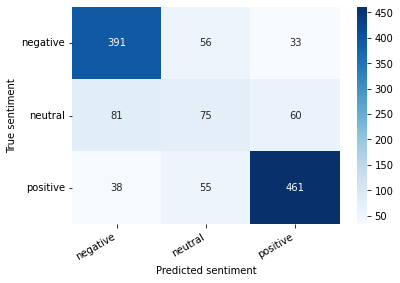

In [44]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=classnames, columns=classnames)
show_confusion_matrix(df_cm)

In [45]:
idx = 2

review_text = y_review_texts[idx]
true_sentiment = y_test[idx]
pred_df = pd.DataFrame({
  'class_names': classnames,
  'values': y_pred_probs[idx]
})

In [46]:
from textwrap import wrap
print("\n".join(wrap(review_text)))
print()
print(f'True sentiment: {classnames[true_sentiment]}')

Easy to use. No dramas. Very streamline for basic list use.

True sentiment: positive


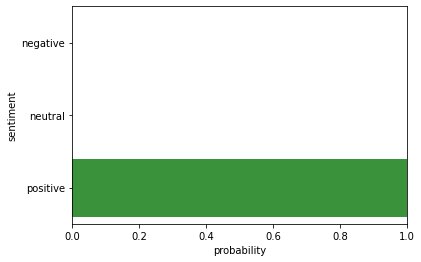

In [47]:
sns.barplot(x='values', y='class_names', data=pred_df, orient='h')
plt.ylabel('sentiment')
plt.xlabel('probability')
plt.xlim([0, 1]);

In [48]:
#predict one text
review_text = "I love completing my todos! Best app ever!!!"

In [49]:
encoded_review = tokenizer.encode_plus(
  review_text,
  max_length=max_length,
  add_special_tokens=True,
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',
)

In [50]:
input_ids = encoded_review['input_ids'].to(device)
attention_mask = encoded_review['attention_mask'].to(device)

output = model(input_ids, attention_mask)
_, prediction = torch.max(output, dim=1)

print(f'Review text: {review_text}')
print(f'Sentiment  : {classnames[prediction]}')

Review text: I love completing my todos! Best app ever!!!
Sentiment  : positive
